# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

## Import Statements

In [58]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [59]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [60]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [61]:
print(f'Median_Household_Income_2015 has rows and column of {df_hh_income.shape}')
print(f'Pct_People_Below_Poverty_Level has rows and column of {df_pct_poverty.shape}')
print(f'Pct_Over_25_Completed_High_School has rows and column of {df_pct_completed_hs.shape}')
print(f'Share_of_Race_By_City has rows and column of {df_share_race_city.shape}')
print(f'Deaths_by_Police_US has rows and column of {df_fatalities.shape}')

Median_Household_Income_2015 has rows and column of (29322, 3)
Pct_People_Below_Poverty_Level has rows and column of (29329, 3)
Pct_Over_25_Completed_High_School has rows and column of (29329, 3)
Share_of_Race_By_City has rows and column of (29268, 7)
Deaths_by_Police_US has rows and column of (2535, 14)


In [62]:
print(f'Median_Household_Income_2015 has a column of {df_hh_income.columns}')
print(f'Pct_People_Below_Poverty_Level has rows and column of {df_pct_poverty.columns}')
print(f'Pct_Over_25_Completed_High_School has rows and column of {df_pct_completed_hs.columns}')
print(f'Share_of_Race_By_City has rows and column of {df_share_race_city.columns}')
print(f'Deaths_by_Police_US has rows and column of {df_fatalities.columns}')

Median_Household_Income_2015 has a column of Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Pct_People_Below_Poverty_Level has rows and column of Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Pct_Over_25_Completed_High_School has rows and column of Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Share_of_Race_By_City has rows and column of Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Deaths_by_Police_US has rows and column of Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [63]:
print(f'Median_Household_Income_2015 NaN values: {df_hh_income.isna().values.any()}')
print(f'Pct_People_Below_Poverty_Level NaN values: {df_pct_poverty.isna().values.any()}')
print(f'Pct_Over_25_Completed_High_School NaN values: {df_pct_completed_hs.isna().values.any()}')
print(f'Share_of_Race_By_City NaN values: {df_share_race_city.isna().values.any()}')
print(f'Deaths_by_Police_US NaN values: {df_fatalities.isna().values.any()}')


df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

Median_Household_Income_2015 NaN values: True
Pct_People_Below_Poverty_Level NaN values: False
Pct_Over_25_Completed_High_School NaN values: False
Share_of_Race_By_City NaN values: False
Deaths_by_Police_US NaN values: True


In [64]:
print(f'Median_Household_Income_2015 Duplicated values: {df_hh_income.duplicated().values.any()}')
print(f'Pct_People_Below_Poverty_Level Duplicated values: {df_pct_poverty.duplicated().values.any()}')
print(f'Pct_Over_25_Completed_High_School Duplicated values: {df_pct_completed_hs.duplicated().values.any()}')
print(f'Share_of_Race_By_City Duplicated values: {df_share_race_city.duplicated().values.any()}')
print(f'Deaths_by_Police_US Duplicated values: {df_fatalities.duplicated().values.any()}')

Median_Household_Income_2015 Duplicated values: False
Pct_People_Below_Poverty_Level Duplicated values: False
Pct_Over_25_Completed_High_School Duplicated values: False
Share_of_Race_By_City Duplicated values: False
Deaths_by_Police_US Duplicated values: False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [65]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate, errors='coerce')

In [66]:
poverty_rate = df_pct_poverty.groupby(by="Geographic Area", as_index=False).agg({'poverty_rate': pd.Series.mean})
poverty_rate.sort_values(by='poverty_rate', ascending=False, inplace=True)

In [127]:
fig_a = px.bar(data_frame=poverty_rate, x='Geographic Area', y='poverty_rate', color='Geographic Area')
fig_a.update_layout(showlegend=False, title="Poverty Rate by US State")

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [68]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs, errors='coerce')

In [69]:
graduation_rate = df_pct_completed_hs.groupby(by="Geographic Area", as_index=False).agg({'percent_completed_hs': pd.Series.mean})
graduation_rate.sort_values(by='percent_completed_hs', inplace=True)


In [128]:
fig_b = px.bar(data_frame=graduation_rate, x='Geographic Area', y='percent_completed_hs', color="Geographic Area")
fig_b.update_layout(showlegend=False, title="High School Completion Rate by US State")

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [71]:
merged_df = pd.merge(poverty_rate, graduation_rate, on=['Geographic Area'])

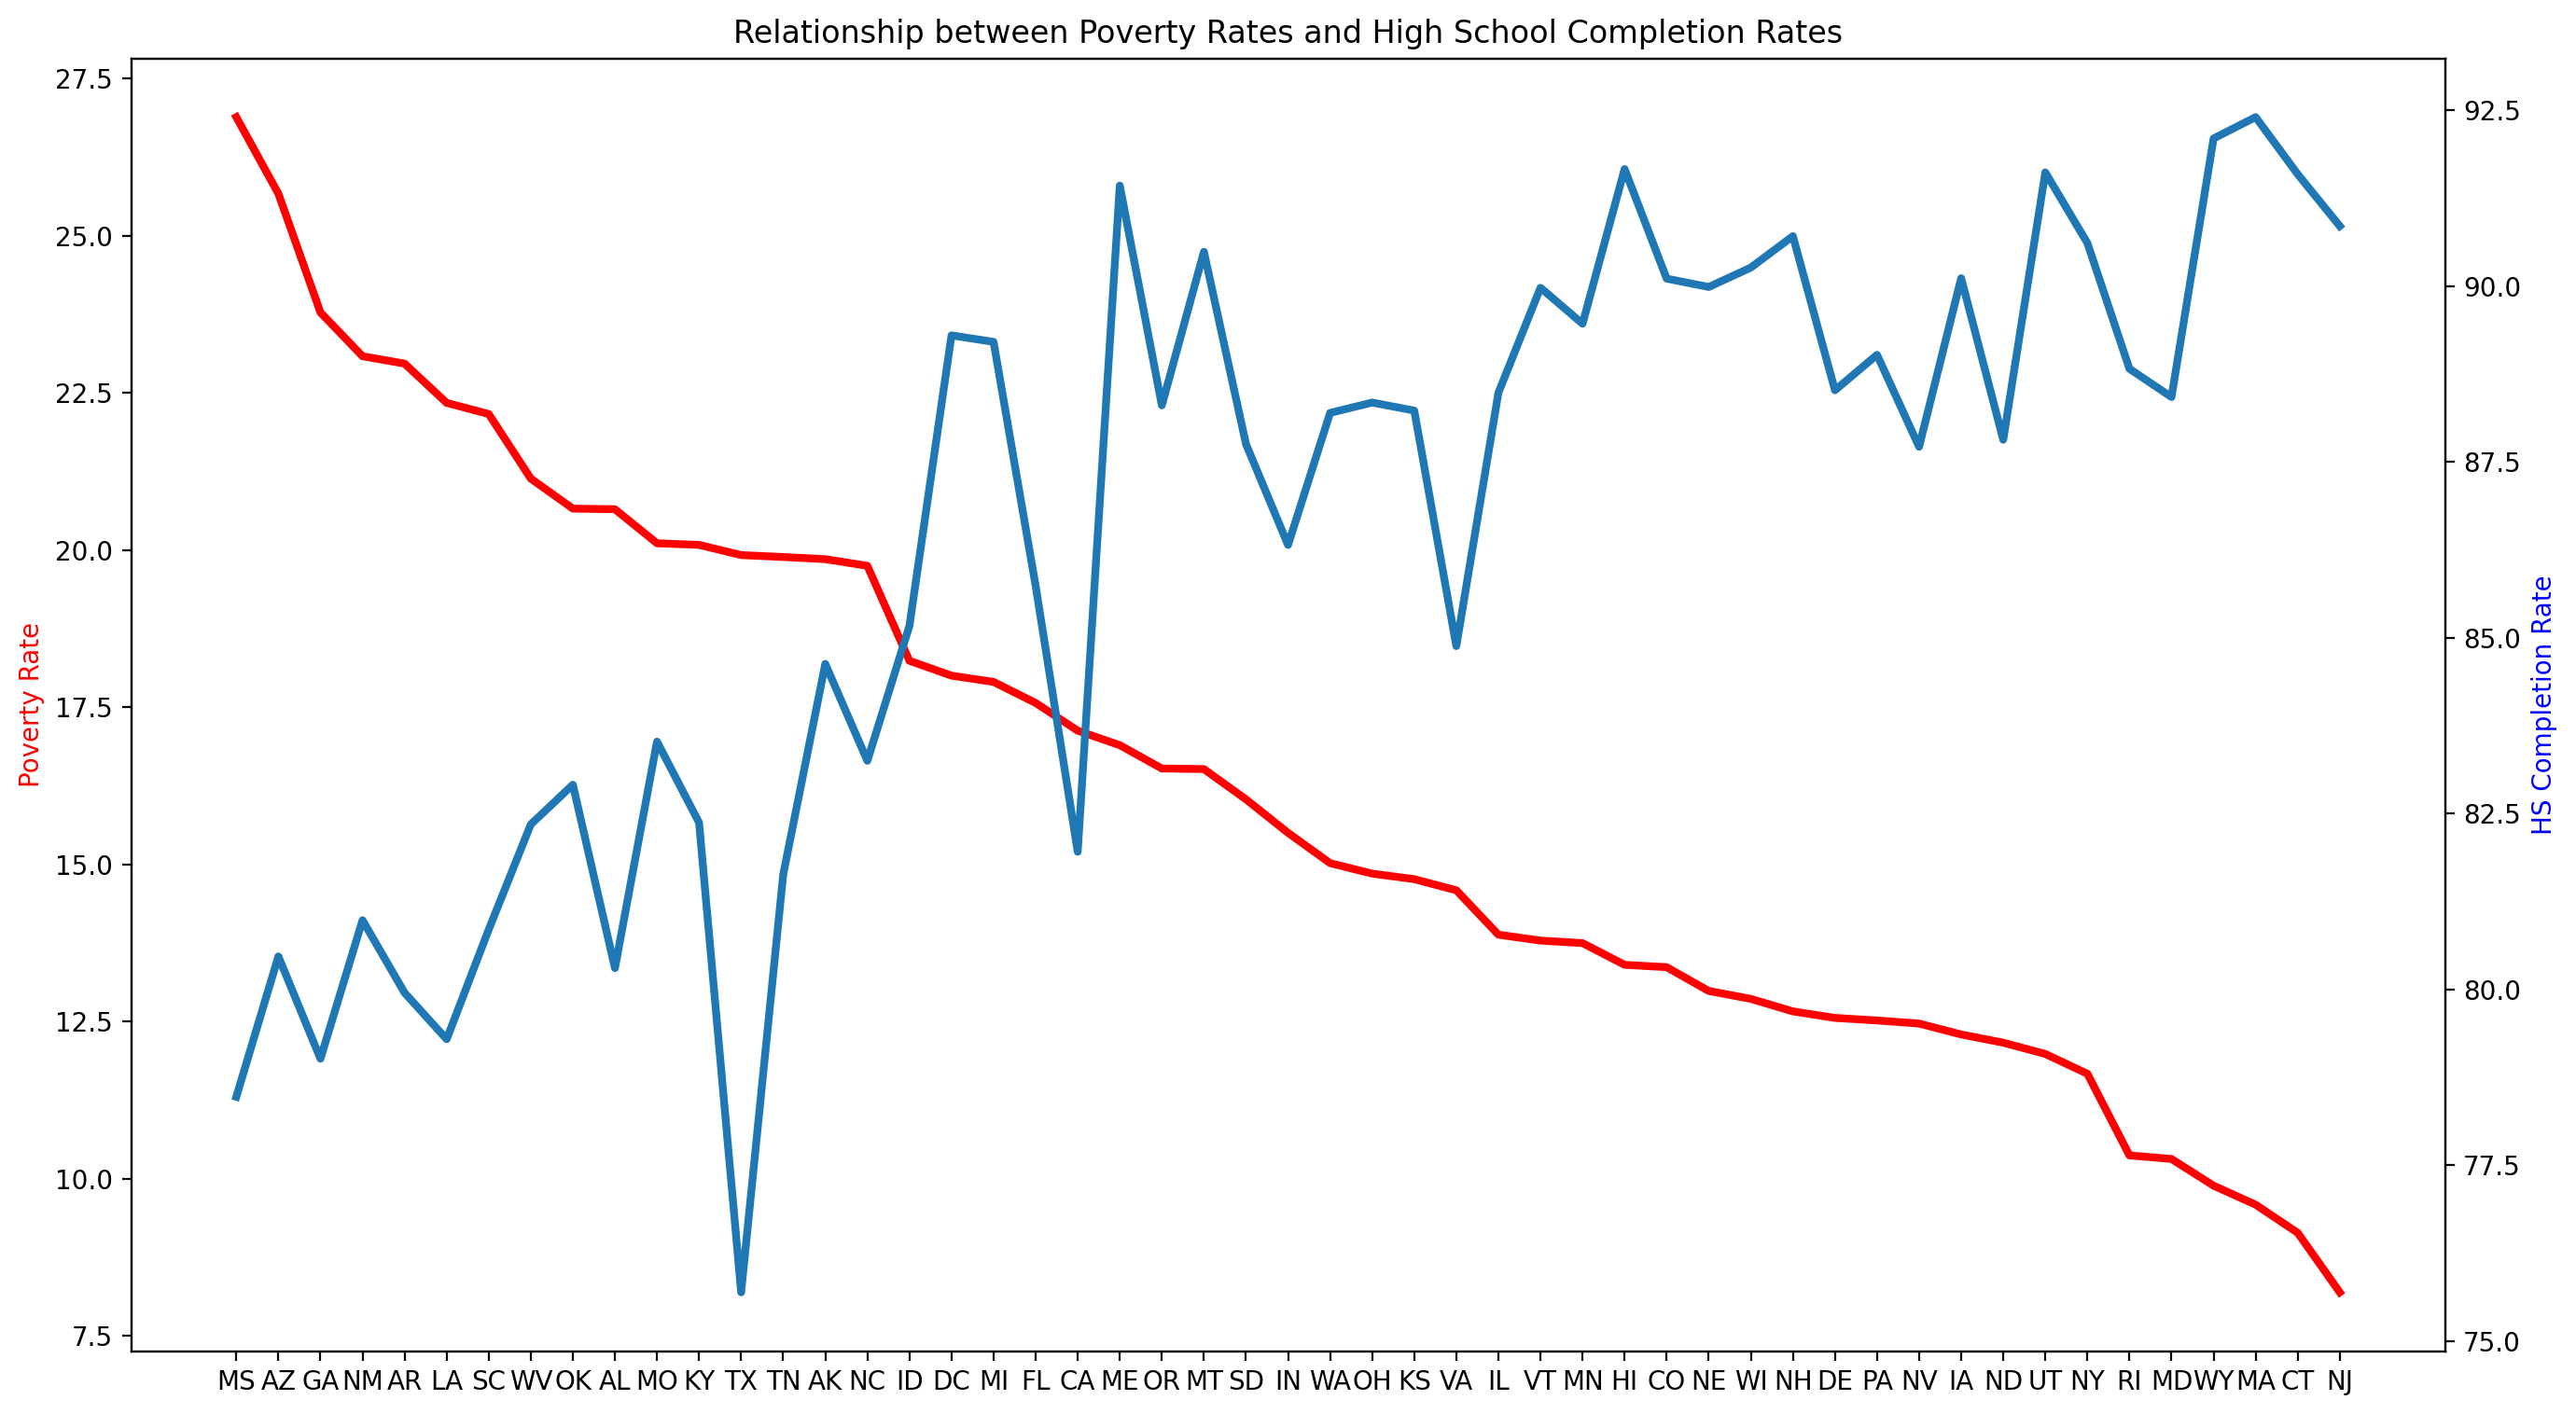

In [72]:
plt.figure(figsize=(16, 9), dpi=200)
ax1 = plt.gca()
ax2 = plt.twinx()

plt.title("Relationship between Poverty Rates and High School Completion Rates")

ax1.plot(merged_df['Geographic Area'], merged_df.poverty_rate, c="red", lw=3)
ax2.plot(merged_df['Geographic Area'], merged_df.percent_completed_hs, lw=3)

ax1.set_ylabel('Poverty Rate', c= 'red')
ax2.set_ylabel('HS Completion Rate', c= 'blue')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

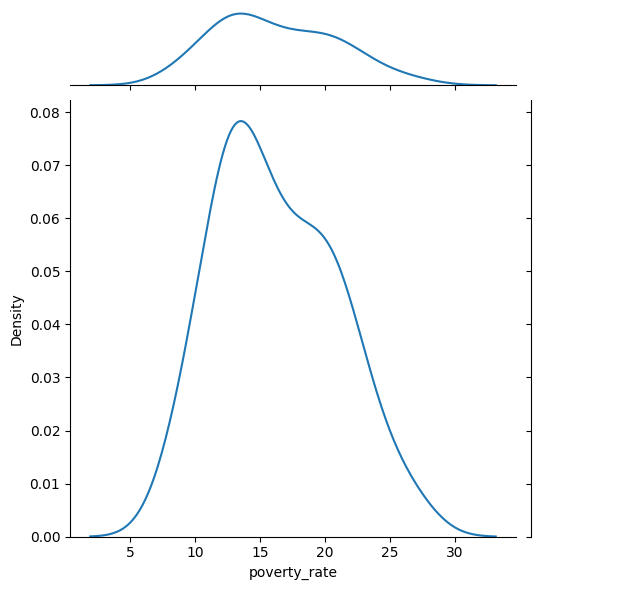

In [73]:
sns.jointplot(data=merged_df, x= merged_df.poverty_rate, kind='kde')
plt.show()

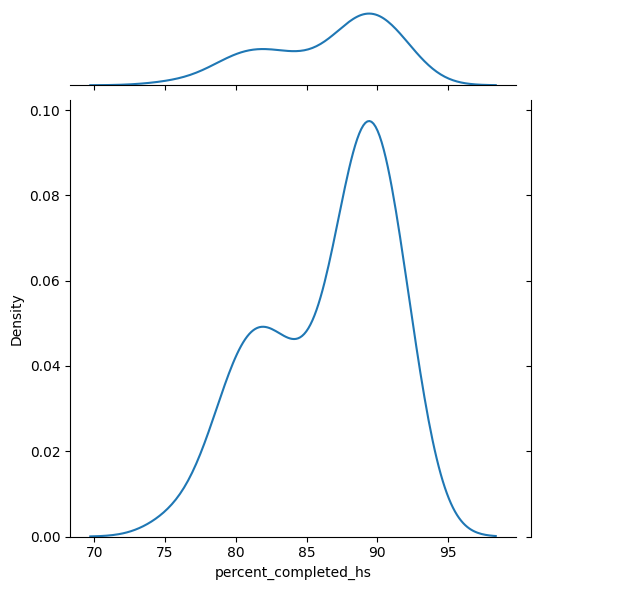

In [74]:
sns.jointplot(data=merged_df, x=merged_df.percent_completed_hs, kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

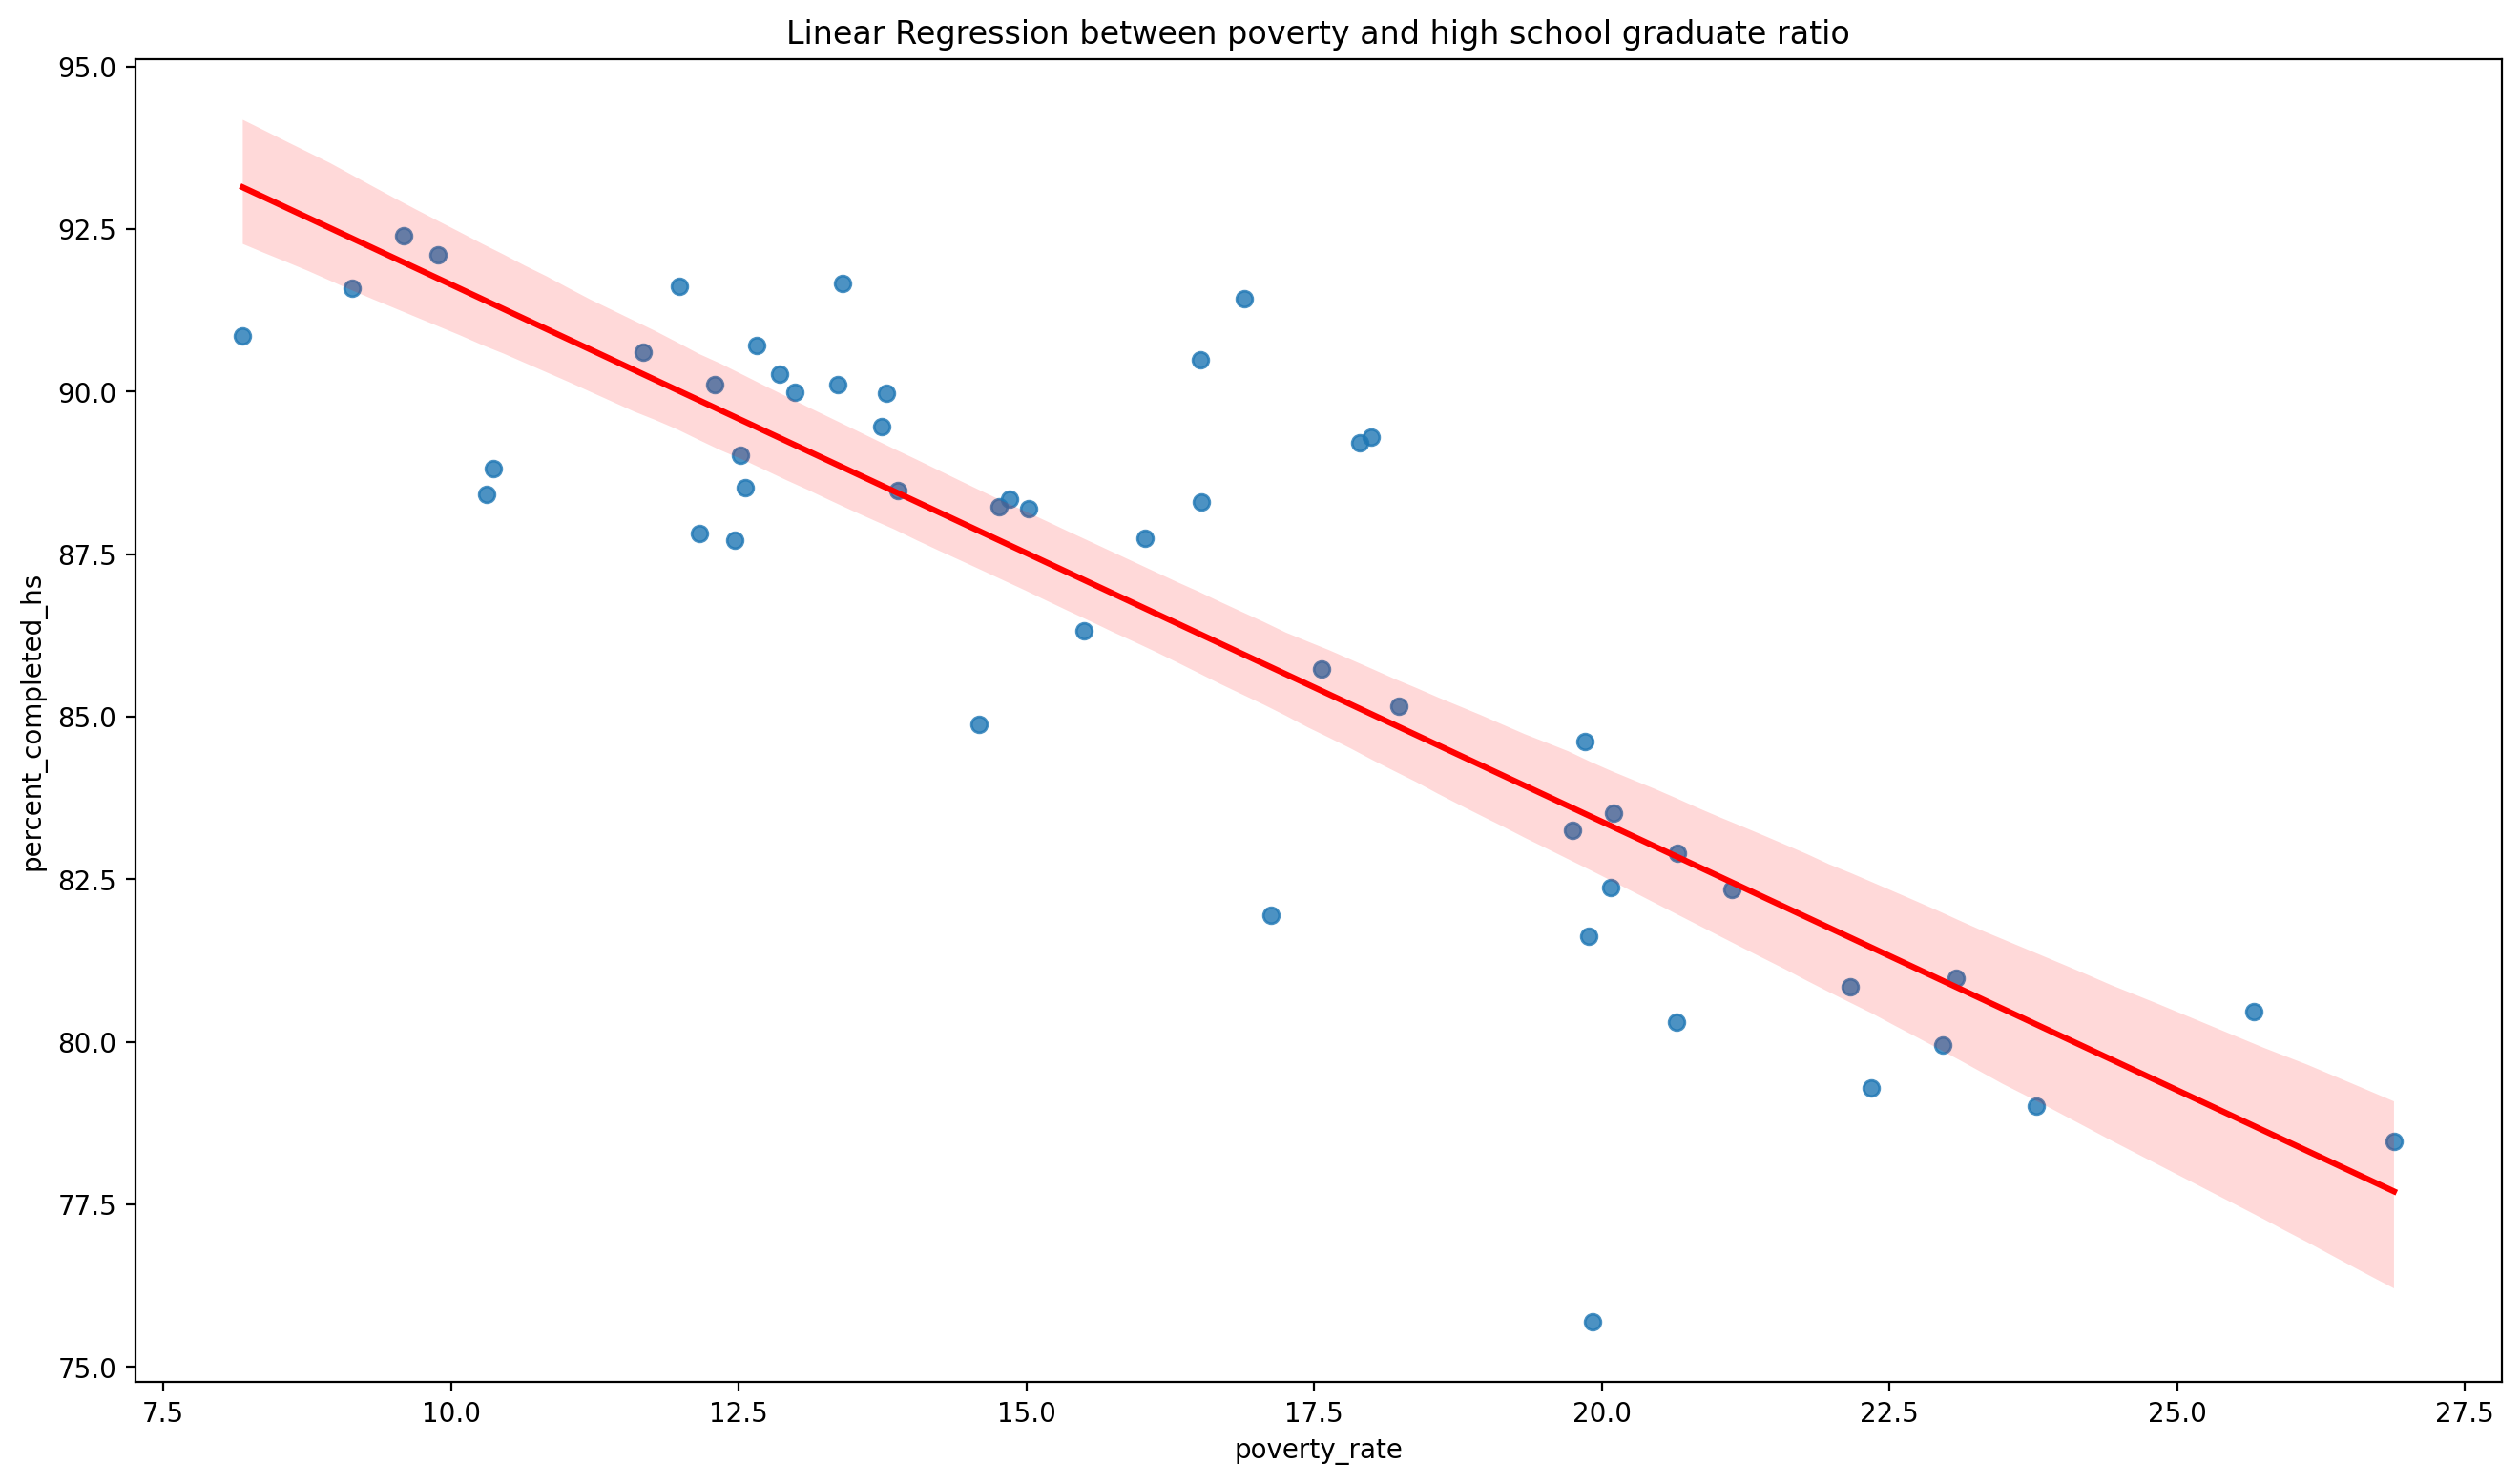

In [75]:
plt.figure(figsize=(16, 9), dpi=200)
sns.regplot(data=merged_df, x='poverty_rate', y='percent_completed_hs', line_kws={'color': 'red'})
plt.title("Linear Regression between poverty and high school graduate ratio")
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [76]:
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white, errors='coerce')
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black, errors='coerce')
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american, errors='coerce')
df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian, errors='coerce')
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic, errors='coerce')

In [77]:
racial_df = df_share_race_city.groupby("Geographic area", as_index=False).agg({'share_white': pd.Series.mean,
                                                               'share_black' : pd.Series.mean,
                                                               'share_native_american' : pd.Series.mean,
                                                               'share_asian': pd.Series.mean,
                                                               'share_hispanic' : pd.Series.mean
                                                               }).sort_values(by='share_white',ascending=False)


In [78]:
px.bar(racial_df, x='Geographic area', y=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'])


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [79]:
race_death = df_fatalities.value_counts('race')
race_death

race
W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: count, dtype: int64

In [80]:
fig_c = px.pie(data_frame=race_death, values='count', names=race_death.index, hole=0.5)
fig_c.update_layout(title="Chart based on Race")


# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [81]:
gender_death = df_fatalities.value_counts('gender')
gender_death

gender
M    2428
F     107
Name: count, dtype: int64

In [82]:
fig_d = px.bar(data_frame=gender_death, x=gender_death.index,  y='count')

fig_d.update_layout(title='Deaths based on Gender')

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [83]:
fig_e = px.box(data_frame=df_fatalities, x='gender', y='age', color='gender')
fig_e.update_layout(title="Deaths based on the relationship of Age and Gender")

In [84]:
fig_f = px.box(data_frame=df_fatalities, x='gender', y='armed', color='gender')
fig_f.update_layout(title="Deaths based on the relationship of Gender and Armed weapon")

In [85]:
fig_g = px.box(data_frame=df_fatalities, x='gender', y='signs_of_mental_illness', color='gender')
fig_g.update_layout(title="Deaths based on the relationship of Gender and Mental Status")

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [86]:
armed_count = df_fatalities.value_counts('armed')

In [87]:
fig_h = px.line(data_frame=armed_count, x=armed_count.index, y= 'count')

fig_h.update_layout(title='Weapons carried (including unarmed to show the number)')

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [88]:
df_fatalities.age = pd.to_numeric(df_fatalities.age, errors='coerce')

In [89]:
under_25 = df_fatalities[df_fatalities.age <= 25]
percentage = under_25.age.sum() / df_fatalities.age.sum() * 100
percentage

np.float64(13.257979905752645)

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [90]:
fig_i = px.histogram(data_frame=df_fatalities, x='age', color='age')
fig_i.update_layout(title="Histogram Count distribution of ages killed by police")

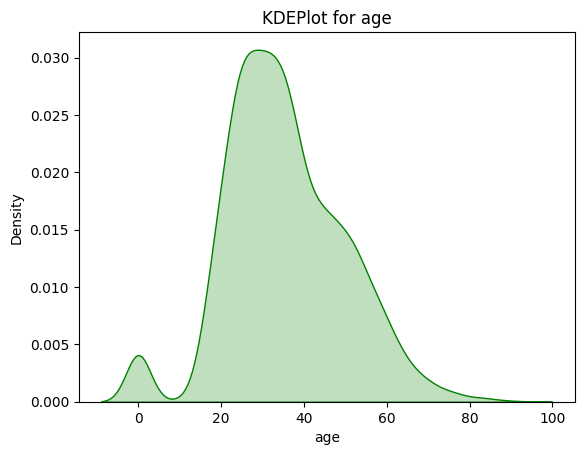

In [91]:
sns.kdeplot(data=df_fatalities, x='age', color='green', fill='true')
plt.title("KDEPlot for age")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

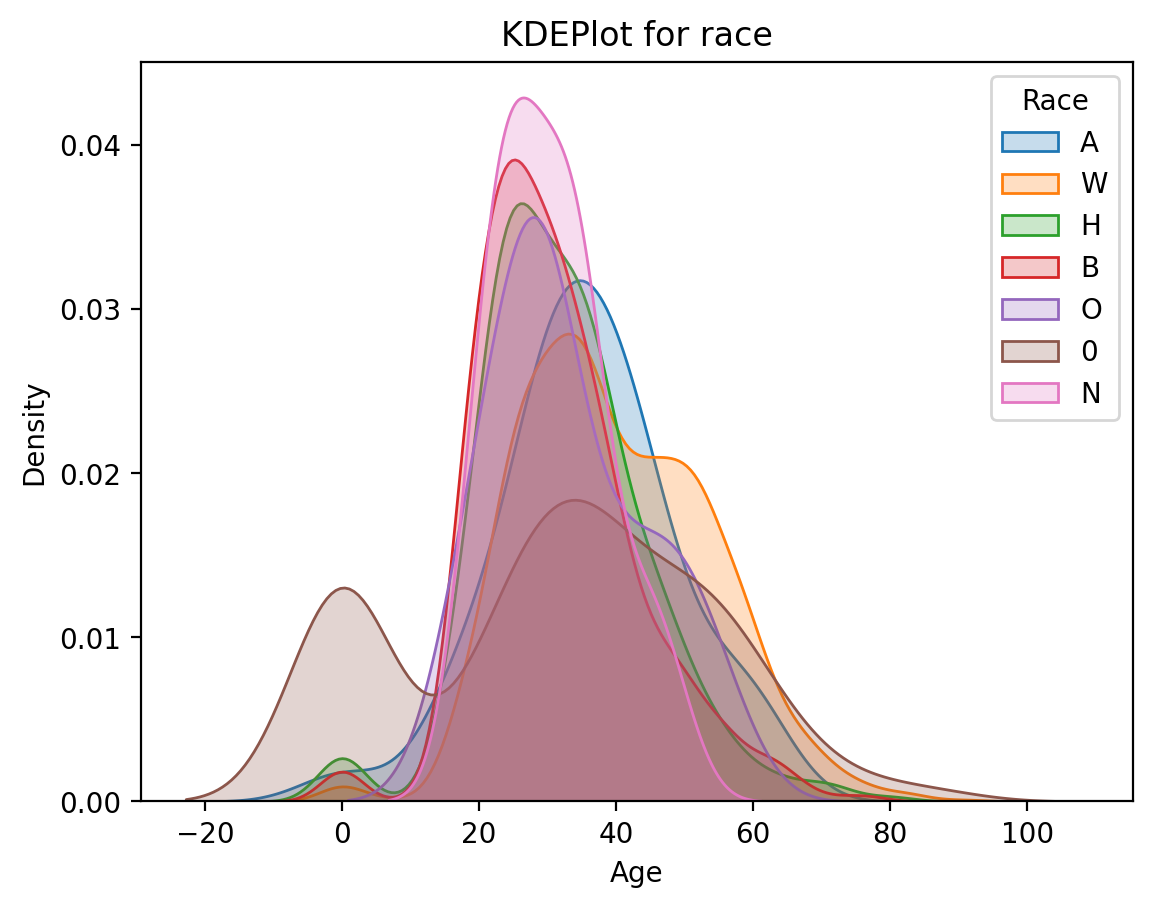

In [92]:
plt.figure(dpi=200)

for race in df_fatalities.race.unique():
    sns.kdeplot(df_fatalities[df_fatalities.race == race].age, fill='true', label=race)

plt.title("KDEPlot for race")
plt.xlabel('Age')
plt.legend(title='Race', loc='upper right')
plt.ylabel('Density')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [93]:
race_count = df_fatalities.value_counts('race')

In [94]:
fig_j = px.bar(x=race_count.index, y=race_count.values, color=race_count.values)

fig_j

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [95]:
illness = df_fatalities[df_fatalities.signs_of_mental_illness == True]

percentage_mental = illness.signs_of_mental_illness.count() / df_fatalities.signs_of_mental_illness.count() * 100
percentage_mental

np.float64(24.970414201183434)

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [96]:
top_city = df_fatalities.groupby('state', as_index=False).agg({'name': pd.Series.count}).sort_values(by='name', ascending=False).head(10)
top_city

,state,name
4,CA,424
43,TX,225
9,FL,154
3,AZ,118
35,OH,79
36,OK,78
5,CO,74
10,GA,70
27,NC,69
24,MO,64


In [97]:
fig_k = px.bar(data_frame=top_city, x='state', y='name', color='name')
fig_k.update_layout(title='Top 10 US States with most police fatalities')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [98]:
race_rate = df_fatalities[df_fatalities.state.isin(top_city.state)]
race_rate = race_rate.groupby(['race', 'state'], as_index=False).agg({'name': pd.Series.count}).sort_values('name', ascending=False)

In [99]:
fig_l = px.bar(data_frame=race_rate, x='state', y='name', color='race')
fig_l.update_layout(title="Share of Race by Top 10 US states")

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [105]:
state_df = df_fatalities.groupby('state', as_index=False).agg({'name': pd.Series.count})

In [130]:
fig_m = px.choropleth(data_frame=state_df, locations='state', scope='usa', color='name', locationmode="USA-states")
fig_m.update_layout(title='US state map based on police killings')

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [152]:
df_fatalities.date = pd.to_datetime(df_fatalities.date, errors='coerce')

In [153]:
df_fatalities['month_year'] = df_fatalities.date.dt.strftime('%Y-%m')
date_df = df_fatalities.groupby('month_year', as_index=False).agg({'name': pd.Series.count})

In [151]:
fig_n = px.line(data_frame=date_df, x='month_year', y='name')
fig_n.update_layout(title="Deaths by Police over time", )

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

Ladies and gentlemen,

As we draw this important discussion to a close, it's imperative that we reflect on the sobering reality of police brutality—an issue that has cast a long and dark shadow over our communities, particularly affecting the most vulnerable among us.

This crisis is not just about numbers, nor is it merely an abstract concept; it’s a human issue that cuts across race, age, and socio-economic status. Every statistic represents a life, a story, a family forever altered by an encounter that should have protected, but instead, inflicted harm.

We've seen how young Black and Brown men are disproportionately affected by police violence, a harsh reminder of the systemic biases that continue to plague our society. These young lives, filled with potential and dreams, are too often cut short or deeply scarred by those sworn to protect them. The statistics reveal an undeniable trend—race and age are significant factors in these tragic encounters. But beyond the data, there is a deep, persistent pain felt by mothers, fathers, siblings, and communities who live with the fear that their loved ones might not come home.

This isn't just about the individuals directly impacted by these acts of brutality; it's about the corrosive effect it has on the trust between law enforcement and the communities they serve. When a young person of color is afraid to walk down the street, not because of criminals, but because of those who wear the badge, we must ask ourselves: How did we get here? And more importantly, how do we move forward?

Addressing police brutality is not solely the responsibility of law enforcement; it is a challenge that demands action from every sector of society. We must push for comprehensive reforms that include better training, accountability, and a shift in policing culture that prioritizes de-escalation and respect for human dignity over aggression and control.

We must also amplify the voices of those who have been silenced—those whose stories have been cut short—and ensure that their experiences are not forgotten in the fight for justice. This is about ensuring that the future generations, regardless of race or age, do not inherit the same fears and injustices that have plagued so many before them.

Let us commit to creating a society where the color of your skin or the age you are does not determine how you are treated by those in power. Let us demand that the value of a life is recognized equally, and that the promise of safety and justice is fulfilled for all.

Thank you.